# **Import** libraries

In [0]:
from google.colab import drive
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
plt.style.available

['seaborn-deep',
 'seaborn-talk',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'tableau-colorblind10',
 'seaborn-dark-palette',
 'bmh',
 '_classic_test',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn',
 'seaborn-darkgrid',
 'classic',
 'ggplot',
 'dark_background',
 'seaborn-bright',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-white',
 'grayscale',
 'fast',
 'seaborn-poster',
 'Solarize_Light2',
 'seaborn-dark',
 'seaborn-colorblind']

In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Read Data

In [0]:
data=glob.glob('/content/gdrive/My Drive/forest-cover-type-prediction/*')
data_train=pd.read_csv(data[2])

In [5]:
data_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
data

['/content/gdrive/My Drive/forest-cover-type-prediction/sampleSubmission.csv',
 '/content/gdrive/My Drive/forest-cover-type-prediction/test.csv',
 '/content/gdrive/My Drive/forest-cover-type-prediction/train.csv',
 '/content/gdrive/My Drive/forest-cover-type-prediction/covtype.data']

In [0]:
data_all_big=pd.read_csv(data[3],header=None)

In [0]:
data_all_big

In [0]:
data_train2=data_train.drop(['Id'],axis=1)

In [10]:
data_train2.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

# Balancing of Dataset

In [0]:
counts=data_train2['Cover_Type'].value_counts()

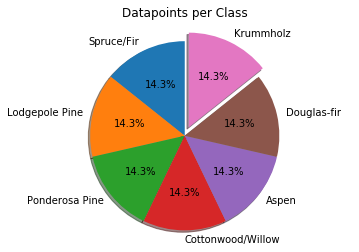

In [12]:
##########Pie chart
# Create a pie chart
explode = [0,0,0,0,0,0,0.1]
classes=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
plt.pie(counts, explode=explode, labels=classes, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title("Datapoints per Class")
plt.show()

# **Feature** **Exploration** 

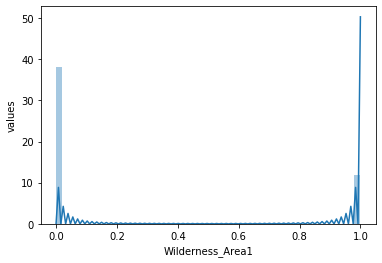

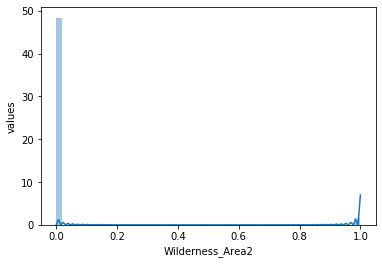

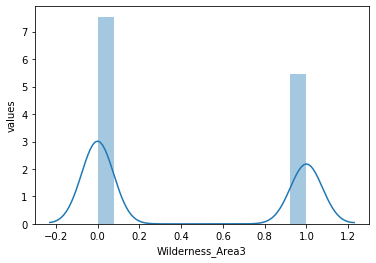

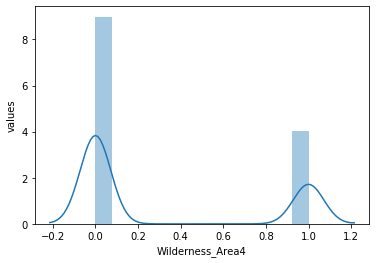

In [13]:
#checking each categorical feature independently
for name in data_train2.columns:
    if name[0:4] == 'Wild':
        plt.figure()
        plt.ylabel('values')
        sns.distplot( data_train2[name]);

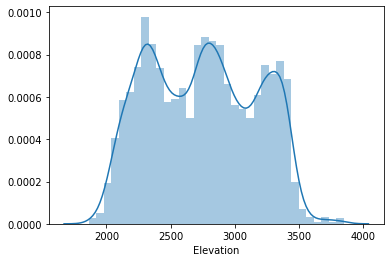

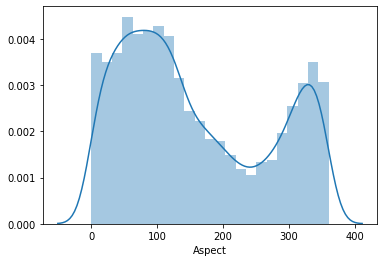

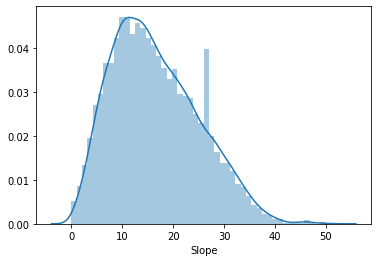

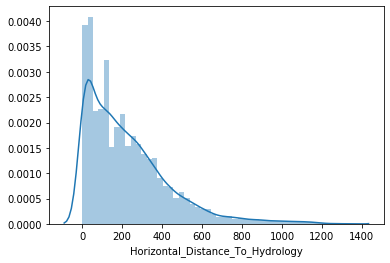

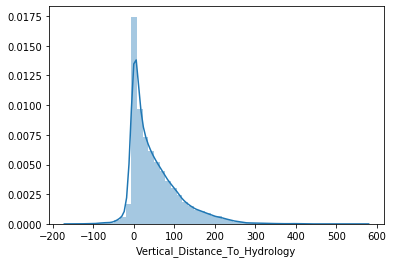

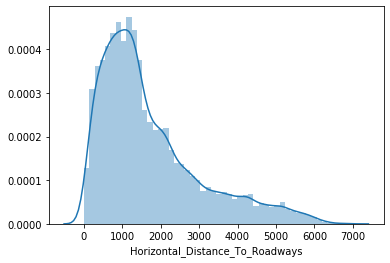

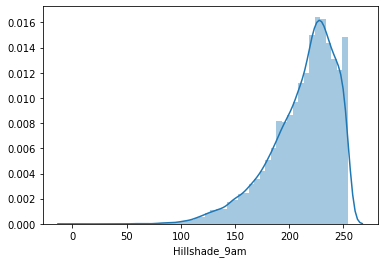

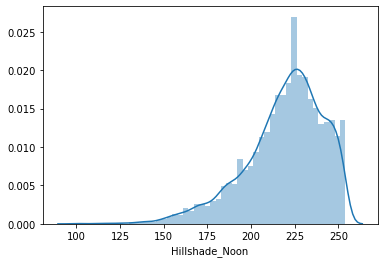

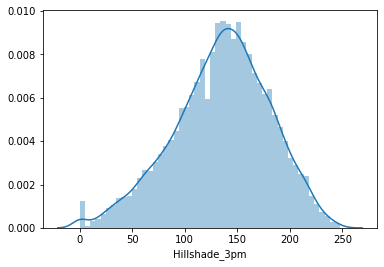

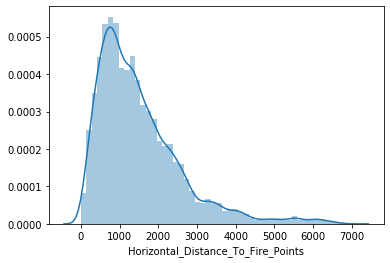

In [14]:
#checking each numerical feature independently
for name in data_train2.columns:
    if name[0:4] != 'Soil' and name[0:4] != 'Wild' and name != 'Id' and name != 'Cover_Type':
        plt.figure()
        sns.distplot( data_train2[name]);

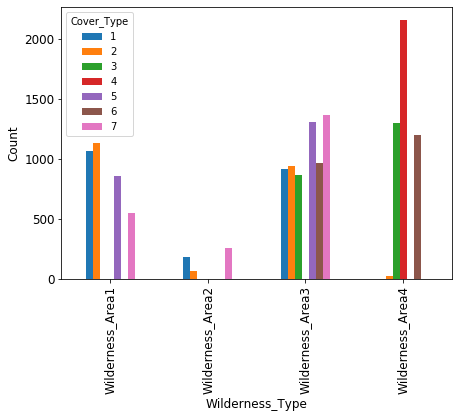

In [15]:
#checking each categorical feature with respect to target variable
col_names_wilderness = [x for x in data_train2.columns.tolist() if "Wilderness" in x]
types_sum = data_train2[col_names_wilderness].groupby(data_train2['Cover_Type']).sum()
ax = types_sum.T.plot(kind='bar', figsize=(7, 5), legend=True, fontsize=12)
ax.set_xlabel("Wilderness_Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

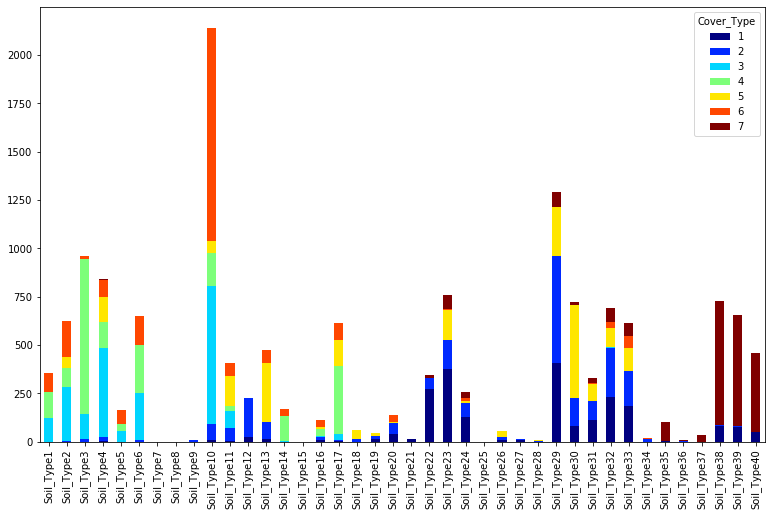

In [16]:
#checking every soil type feature with respect to forest cover type

soil_types = [item for item in data_train2.columns if "Soil" in item]
types_sum =  data_train2[soil_types].groupby( data_train2['Cover_Type']).sum()
types_sum.T.plot(kind='bar', stacked=True, figsize=(13,8), cmap='jet')

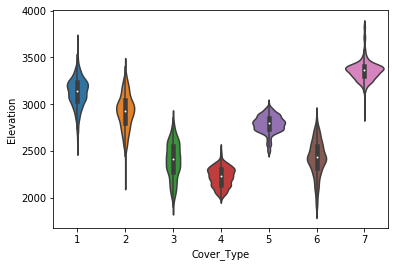

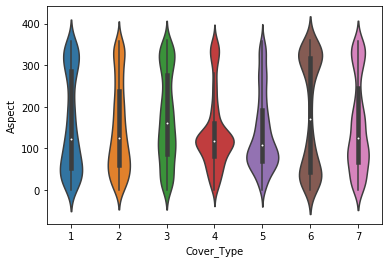

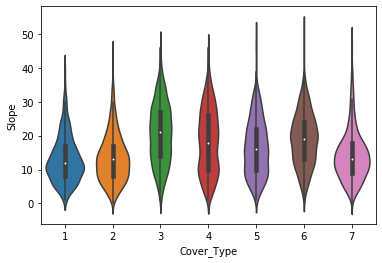

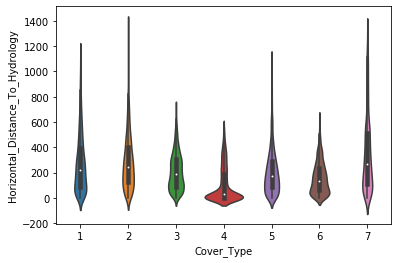

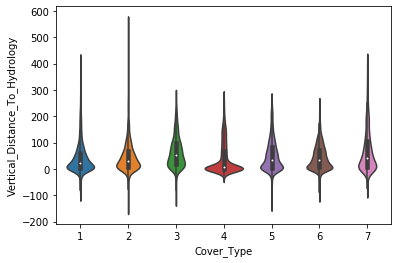

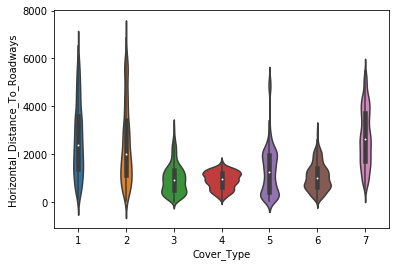

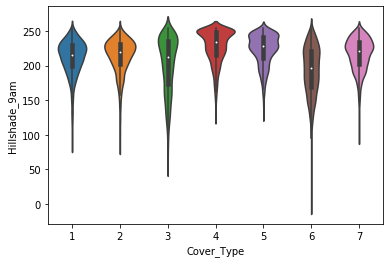

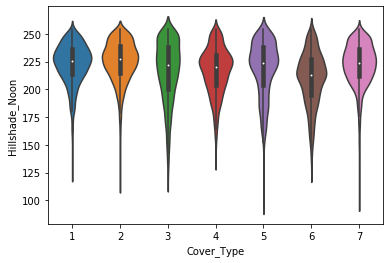

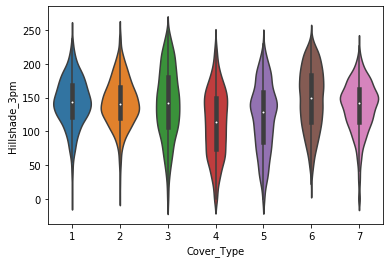

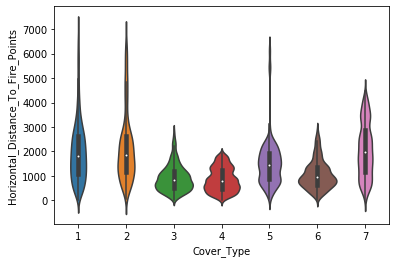

In [17]:
#checking for numerical columns with respect to target variable
for i in range(0,10):
    sns.violinplot(data_train2.Cover_Type,data_train2.iloc[:,i])
    plt.show()


## Checking null values

In [0]:
print(data_train2.isna().sum())

### Skewness in categorical variables  

In [0]:
cols=data_train2.columns
data_train_categorical=data_train2.drop(['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'],axis=1)

In [0]:
data_train_categorical.skew()

In [62]:
data_train2['Soil_Type18'].value_counts()

0    15060
1       60
Name: Soil_Type18, dtype: int64

### Checking skewness factor for  every categorical column

In [22]:
Column_Info = []
for col in data_train2.columns:
    Column_Info.append((col, data_train2[col].dtype, data_train2[col].nunique(), data_train2[col].isnull().sum() * 100 / data_train2.shape[0], data_train2[col].value_counts(normalize=True, dropna=False).values[0] * 100))
    
Columns_Status = pd.DataFrame(Column_Info, columns=['Feature', "DataType", 'Number of Unique Values', 'Percentage of Missing Values', 'Skewness Factor'])
Columns_Status.sort_values('Percentage of Missing Values', ascending=False)

,Feature,DataType,Number of Unique Values,Percentage of Missing Values,Skewness Factor
0,Elevation,int64,1665,0.0,0.165344
41,Soil_Type28,int64,2,0.0,99.940476
30,Soil_Type17,int64,2,0.0,95.952381
31,Soil_Type18,int64,2,0.0,99.603175
32,Soil_Type19,int64,2,0.0,99.695767
33,Soil_Type20,int64,2,0.0,99.080688
34,Soil_Type21,int64,2,0.0,99.894180
35,Soil_Type22,int64,2,0.0,97.718254
36,Soil_Type23,int64,2,0.0,94.993386
37,Soil_Type24,int64,2,0.0,98.300265


### Skewness in numerical data

In [23]:
data_train_numerical=pd.concat([data_train2['Elevation'],data_train2['Aspect'],data_train2['Slope'],data_train2['Horizontal_Distance_To_Hydrology'],data_train2['Vertical_Distance_To_Hydrology'],data_train2['Horizontal_Distance_To_Roadways'],data_train2['Hillshade_9am'],data_train2['Hillshade_Noon'],data_train2['Hillshade_3pm'],data_train2['Horizontal_Distance_To_Fire_Points']],axis=1)
data_train_numerical.skew()


Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
dtype: float64

MULTIVARIATE - CORRELATION

(10.0, 0.0)

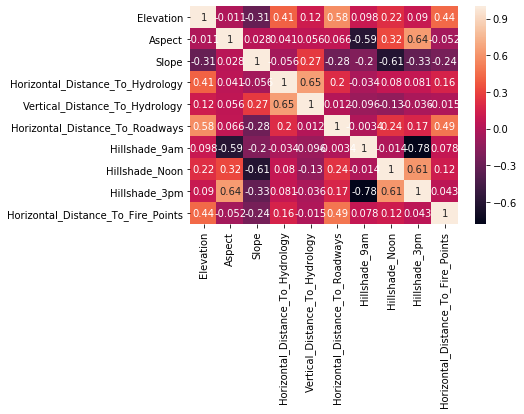

In [59]:
ax =sns.heatmap(data_train_numerical.corr(),annot=True)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)

# Outlier Analysis

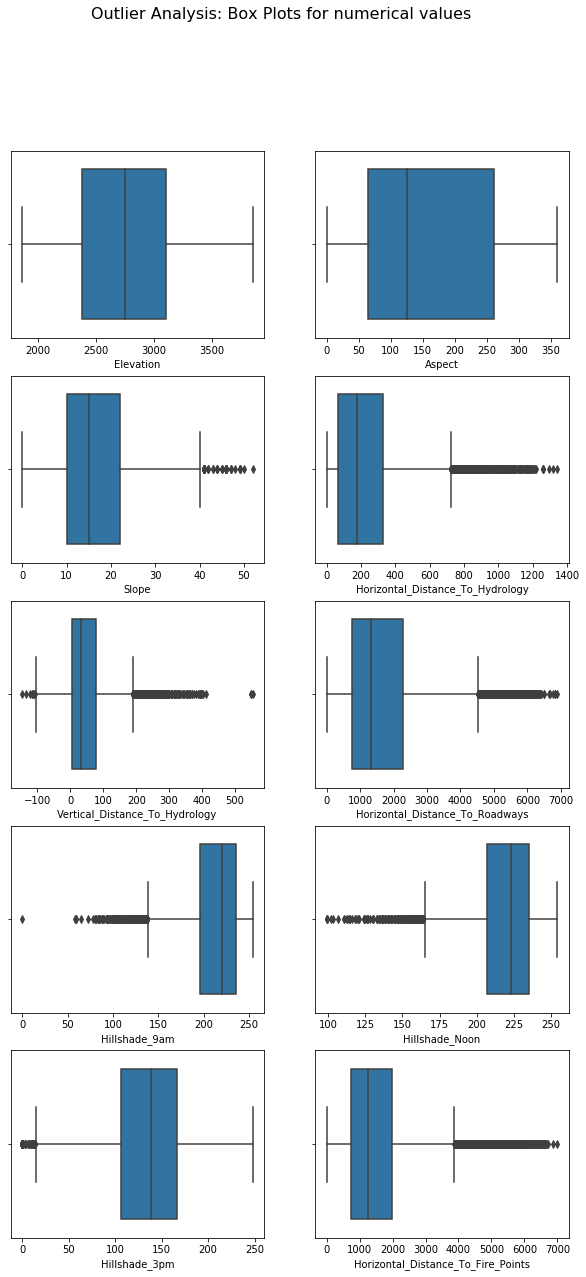

In [24]:
cols=data_train_numerical.columns
fig=plt.figure()
fig.suptitle('Outlier Analysis: Box Plots for numerical values',fontsize=16)
fig.set_figheight(20)
fig.set_figwidth(10)
i=0
for i in range (len(cols)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=data_train_numerical[cols[i]])
    i=i+1
plt.show()

### Removing rows with presence of outliers with z>=5

In [25]:
z = np.abs(stats.zscore(data_train_numerical))
print(np.where(z>3))

(array([    0,     1,     2, ..., 15089, 15092, 15099]), array([9, 9, 9, ..., 7, 7, 7]))


In [0]:
data_train_wo_out = data_train2[(z < 5).all(axis=1)]

In [27]:
x=data_train2.shape[0]-data_train_wo_out.shape[0]
print(x,"rows have been removed due to presence of outliers")

32 rows have been removed due to presence of outliers


In [28]:
data_train2.iloc[:,0:54]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Selection

In [0]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(data_train_wo_out.iloc[:,0:54], data_train_wo_out['Cover_Type'])
imp_features = model.feature_importances_

In [0]:
feature_imp_df = pd.DataFrame([data_train_wo_out.iloc[:,0:54].columns,imp_features]).T

In [0]:
df_featureImp_decr = feature_imp_df.sort_values(1,ascending=False)

In [0]:
fig, axs = plt.subplots(1,1, figsize=(12,3))
ax.plot(df_featureImp_decr[0],df_featureImp_decr[1], 'o-')
ax.set_title('Title')
ax.set_xticks(df_featureImp_decr[0])
ax.set_xticklabels(df_featureImp_decr[0], rotation=40)

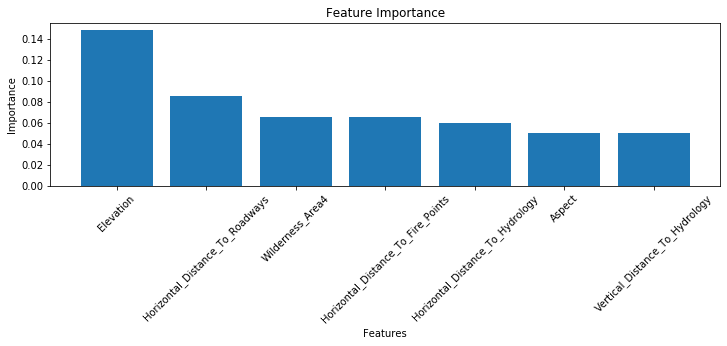

In [54]:
fig, axs = plt.subplots(1,1, figsize=(12,3))
index = np.arange(len(df_featureImp_decr[0].head(7)))
plt.bar(index, df_featureImp_decr[1].head(7))
plt.xlabel('Features', fontsize=10)
plt.ylabel('Importance', fontsize=10)
plt.xticks(index, df_featureImp_decr[0].head(7), fontsize=10, rotation=45)
plt.title('Feature Importance')
plt.show()

### Train-test split

In [0]:
all_data_labels= data_train_wo_out['Cover_Type'].values
all_data= data_train_wo_out.drop(['Cover_Type'],axis=1)

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(all_data.values, all_data_labels, test_size=0.33, random_state=42)

## Cross-Validation

In [0]:
#### K-fold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
def classify(clf):
    kf = KFold(n_splits=5)
    kf.get_n_splits(X_Train)
    scores1=[]
    scores2=[]
    for train_index, test_index in kf.split(X_Train):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_Train[train_index], X_Train[test_index]
        y_train, y_test = y_Train[train_index], y_Train[test_index]
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        acc=accuracy_score(y_test, y_pred)
        print(acc)
        f1=f1_score(y_test, y_pred,average='macro')
        print(f1)
        scores1.append(acc)
        scores2.append(f1)
    print('Mean validation accuracy',np.mean(scores1))
    print('Mean validation F1-score',np.mean(scores2))

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def performance_metrics(y_true,y_pred):
    #print(classification_report(y_true, y_pred,labels=[0,1]))
    print('Accuracy',accuracy_score(y_true,y_pred))
    print('Precision',precision_score(y_true,y_pred,average='micro'))
    print('Precision score micro',recall_score(y_true,y_pred,average='macro'))
    print('Recall score micro',recall_score(y_true,y_pred,average='micro'))
    print('Recall score macro',recall_score(y_true,y_pred,average='macro'))
    print('F1 score micro',f1_score(y_true,y_pred,average='micro'))
    print('F1 score macro',f1_score(y_true,y_pred,average='macro'))
    print(confusion_matrix(y_true,y_pred))
    # print('True positive',tp)
    # print('True negative',tn)
    # print('False positive',fp)
    # print('False negative',fn)
    print('Kappa score',cohen_kappa_score(y_true, y_pred))
    #fpr, tpr, thresholds =roc_curve(y_test, y_score)
    # print('Specificity',tn/(tn+fp))
    # print('Senstivity',tp/(tp+fn))
    # print('tpr', tp/(tp+fn))
    # print('fpr',fp/(fp+tn))

In [38]:
clf1 = GaussianNB()
classify(clf1)

0.5731948565776459
0.5280722516061284
0.6107814045499506
0.5452750515482271
0.5885262116716122
0.5303232525028667
0.5873330034636318
0.5323386808497913
0.6001979218208807
0.5551362176293428
Mean validation accuracy 0.5920066796167441
Mean validation F1-score 0.5382290908272713


In [39]:
from xgboost import XGBClassifier
clf2=XGBClassifier()
classify(clf2)

0.7418397626112759
0.7359329833472593
0.7586547972304649
0.7478974881906799
0.7542037586547973
0.7473168834511352
0.7407224146462148
0.7374394086658398
0.752102919346858
0.7435750562043942
Mean validation accuracy 0.7495047304979222
Mean validation F1-score 0.7424323639718617


In [40]:
from sklearn.tree import DecisionTreeClassifier
clf3=DecisionTreeClassifier()
classify(clf3)

0.7621167161226509
0.7623223290494942
0.7858555885262116
0.7834306796638426
0.7675568743818002
0.768001228236913
0.7654626422563088
0.7696287427782611
0.7501237011380505
0.7496115785933701
Mean validation accuracy 0.7662231044850045
Mean validation F1-score 0.7665989116643761


In [0]:
# from sklearn import svm
# clf4=svm.SVC(C=10,kernel='rbf')
# classify(clf4)

In [42]:
clf1.fit(X_Train,y_Train)
pred=clf1.predict(X_Test)
target=[0,1]
y_score=clf1.predict_proba(X_Test)[:,1]
performance_metrics(y_Test,pred)

Accuracy 0.5901606425702811
Precision 0.5901606425702811
Precision score micro 0.588662498069982
Recall score micro 0.5901606425702811
Recall score macro 0.588662498069982
F1 score micro 0.5901606425702811
F1 score macro 0.5374679334228258
[[486  28   5   0  85   4  90]
 [327 102  45   4 222   2  16]
 [  0   0 509 166  10   1   0]
 [  0   0  81 676   0   0   0]
 [ 56  10 120   0 525   5   0]
 [  4   2 461 128  55  54   0]
 [102   2   3   0   7   0 587]]
Kappa score 0.5219096183411489


In [43]:
clf2.fit(X_Train,y_Train)
pred=clf2.predict(X_Test)
target=[0,1]
y_score=clf2.predict_proba(X_Test)[:,1]
performance_metrics(y_Test,pred)

Accuracy 0.760441767068273
Precision 0.760441767068273
Precision score micro 0.7588565873300066
Recall score micro 0.760441767068273
Recall score macro 0.7588565873300066
F1 score micro 0.760441767068273
F1 score macro 0.7519691719635413
[[482  80   1   0  35   2  98]
 [188 341  15   0 142  23   9]
 [  0   0 457  50  16 163   0]
 [  0   0  37 696   0  24   0]
 [  0  27  13   0 653  23   0]
 [  0   1 154  34  19 496   0]
 [ 38   0   0   0   1   0 662]]
Kappa score 0.7204853795091959


In [44]:
clf3.fit(X_Train,y_Train)
pred=clf3.predict(X_Test)
target=[0,1]
y_score=clf3.predict_proba(X_Test)[:,1]
performance_metrics(y_Test,pred)

Accuracy 0.7791164658634538
Precision 0.7791164658634538
Precision score micro 0.7780524389151482
Recall score micro 0.7791164658634538
Recall score macro 0.7780524389151482
F1 score micro 0.7791164658634538
F1 score macro 0.7763071370349522
[[460 152   0   0  22   2  62]
 [180 411  19   0  82  13  13]
 [  0  23 519  28  11 105   0]
 [  0   1  54 676   0  26   0]
 [  6  47  14   0 641   7   1]
 [  6   9 111  31  17 529   1]
 [ 45  11   0   0   1   0 644]]
Kappa score 0.7422885566522013


In [46]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf4.fit(X_Train,y_Train)
target=[0,1]
y_score=clf4.predict_proba(X_Test)[:,1]
performance_metrics(y_Test,pred)

Accuracy 0.7791164658634538
Precision 0.7791164658634538
Precision score micro 0.7780524389151482
Recall score micro 0.7791164658634538
Recall score macro 0.7780524389151482
F1 score micro 0.7791164658634538
F1 score macro 0.7763071370349522
[[460 152   0   0  22   2  62]
 [180 411  19   0  82  13  13]
 [  0  23 519  28  11 105   0]
 [  0   1  54 676   0  26   0]
 [  6  47  14   0 641   7   1]
 [  6   9 111  31  17 529   1]
 [ 45  11   0   0   1   0 644]]
Kappa score 0.7422885566522013


In [49]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import StratifiedKFold


parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1200,1400,1500,1600,1800], 'alpha': 10.0 ** -np.arange(1, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5]}
clf5 = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf5.fit(X_Train,y_Train)
print(clf5.score(X_Train,y_Train))
print(clf5.best_params_)
target=[0,1]
y_score=clf5.predict_proba(X_Test)[:,1]
performance_metrics(y_Test,pred)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.19489513256826277
{'alpha': 0.1, 'hidden_layer_sizes': 14, 'max_iter': 1000, 'random_state': 3, 'solver': 'lbfgs'}
Accuracy 0.7791164658634538
Precision 0.7791164658634538
Precision score micro 0.7780524389151482
Recall score micro 0.7791164658634538
Recall score macro 0.7780524389151482
F1 score micro 0.7791164658634538
F1 score macro 0.7763071370349522
[[460 152   0   0  22   2  62]
 [180 411  19   0  82  13  13]
 [  0  23 519  28  11 105   0]
 [  0   1  54 676   0  26   0]
 [  6  47  14   0 641   7   1]
 [  6   9 111  31  17 529   1]
 [ 45  11   0   0   1   0 644]]
Kappa score 0.7422885566522013


In [61]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
clf6 = GridSearchCV(GradientBoostingClassifier(), parameters, n_jobs=-1)

clf6.fit(X_Train,y_Train)
print(clf6.score(X_Train,y_Train))
print(clf6.best_params_)
target=[0,1]
y_score=clf6.predict_proba(X_Test)[:,1]
performance_metrics(y_Test,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.warnings.warn(CV_WARNING, FutureWarning)
Accuracy 0.8791164658634538
Precision 0.8791164658634538
Precision score micro 0.8780524389151482
Recall score micro 0.8791164658634538
Recall score macro 0.8780524389151482
F1 score micro 0.8791164658634538
F1 score macro 0.8763071370349522
[[506 152   0   0  10   2  30]
[80 525  17   0  70  13  10]
[  0  23 547  20  11 85   0]
[  0   1  54 686   0  16   0]
[  6  37  14   0 651   7   1]
[  6   9 81  31  17 559   1]
[ 32  11   0   0   1   0 657]])
Kappa score 0.8422885566522013
